In [1]:
import numpy as np
import pandas as pd
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
import keras
import pickle #To store our model

In [2]:
import os
path = 'Audio_data/Classification1/'
neutral= os.listdir(path+'neutral')
angry= os.listdir(path+'angry')
happy= os.listdir(path+'happy')

In [3]:
print(len(neutral))
print(len(angry))
print(len(happy))

288
192
192


In [4]:
angry[40]

'03-01-05-01-01-02-17.wav'

In [5]:
emotions=[]
for item in neutral:
    emotions.append("neutral")
for item in angry:
    emotions.append("angry")
for item in happy:
    emotions.append("happy")

In [6]:
labels = pd.DataFrame(emotions, columns=[-1])

In [7]:
llist= neutral + angry + happy

In [8]:
def load_audio_file(file_path):
    data = librosa.core.load(file_path)[0] #, sr=16000
    return data

def plot_time_series(data):
    fig = plt.figure(figsize=(15, 6))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

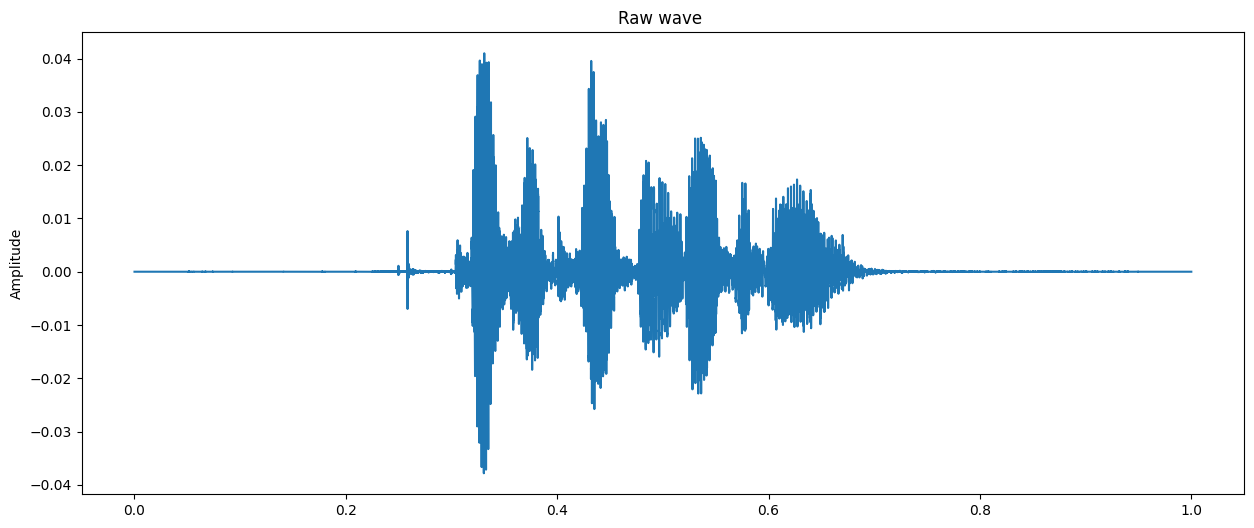

In [9]:
neutral_data = load_audio_file(path+"neutral/03-01-01-01-01-01-01.wav")
plot_time_series(neutral_data)

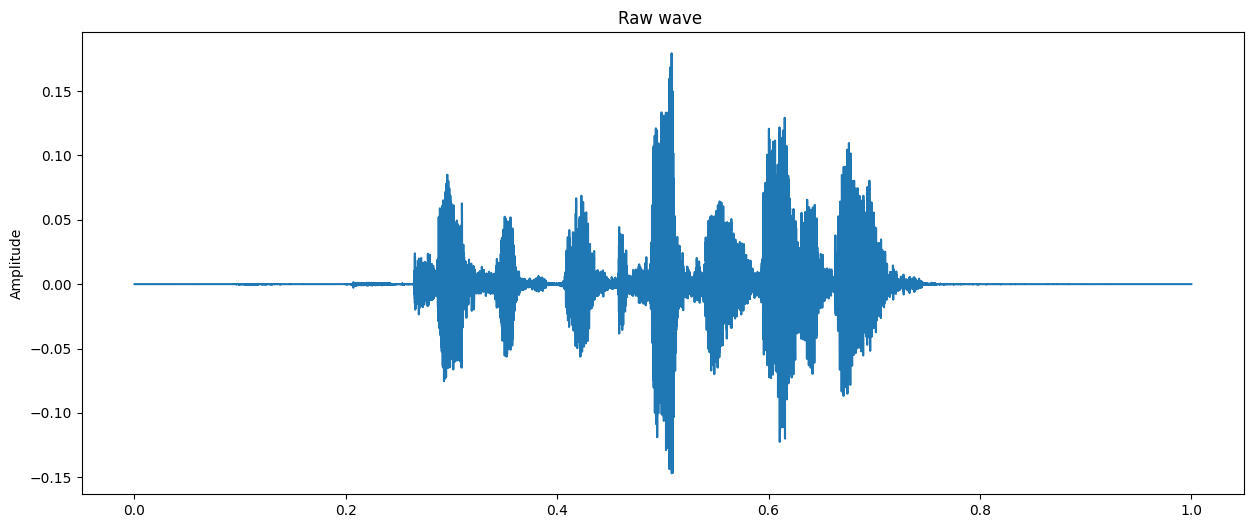

In [10]:
angry_data = load_audio_file(path+"angry/03-01-05-01-01-01-01.wav")
plot_time_series(angry_data)

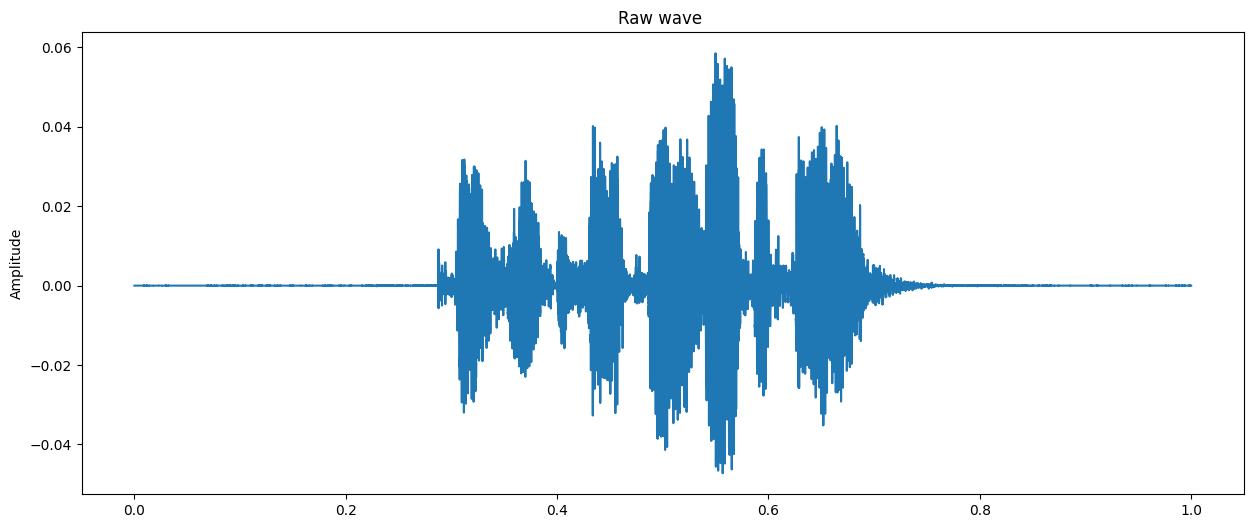

In [11]:
happy_data = load_audio_file(path+"happy/03-01-03-01-01-01-01.wav")
plot_time_series(happy_data)

In [12]:
df = pd.DataFrame(columns=['feature'])
i=0
for index,y in enumerate(llist):

    #result=np.array([])
    if index<288:
        x, sample_rate = librosa.load(path+"neutral/"+y)
        mfccs=np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
    elif index<480:
        x, sample_rate = librosa.load(path+"angry/"+y)
        mfccs=np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
    else :
        x, sample_rate = librosa.load(path+"happy/"+y)
        mfccs=np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
    #result=np.hstack((result, mfccs))

    feature = mfccs
    df.loc[i] = [feature]

    i=i+1

In [13]:
i

672

In [14]:
df[:5]

,feature
0,"[-697.7926, 54.89004, 0.6634653, 12.435786, 7...."
1,"[-650.7109, 54.477303, -9.090127, 8.411754, -4..."
2,"[-614.73914, 56.70819, -2.6855354, 10.650176, ..."
3,"[-695.8503, 42.934265, -7.2745566, 8.977729, -..."
4,"[-713.4335, 68.36094, 7.989171, 15.139791, 11...."


In [15]:
df2 = pd.DataFrame(df['feature'].values.tolist())
df2[:5]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-697.792603,54.890041,0.663465,12.435786,7.733952,0.530750,-3.216631,-3.159394,-10.977551,-2.848711,...,-2.035756,-2.119634,-2.712589,-1.836127,-3.204805,-1.545369,-1.090937,-1.770106,-3.501132,-1.538087
1,-650.710876,54.477303,-9.090127,8.411754,-4.387535,-3.765706,-5.362752,-8.610381,-3.971552,-0.895974,...,0.267783,3.115063,2.003133,4.280788,2.213305,2.787869,-1.610170,1.408178,-0.868951,0.794392
2,-614.739136,56.708191,-2.685535,10.650176,4.240806,-2.472097,-12.035720,-6.654510,-3.152714,-8.526167,...,-1.547991,-1.599212,-1.454374,0.788257,0.095172,-1.148093,-2.609848,-2.022851,-1.139469,2.568811
3,-695.850281,42.934265,-7.274557,8.977729,-4.170578,-4.924890,-6.537960,-12.679187,-7.311471,-3.600855,...,-0.845205,0.562107,-1.981491,1.542930,1.991559,2.471201,1.022188,0.811554,3.747952,4.843490
4,-713.433472,68.360939,7.989171,15.139791,11.715775,0.430983,1.002558,-2.773119,-0.127347,1.893249,...,-0.122066,1.080492,0.320704,0.870715,0.014802,2.581359,-0.475030,-1.121804,-2.148053,0.386706


In [16]:
#df2 = pd.concat([df,labels], axis=1)
df2["label"] = emotions

In [17]:
df2[55:65]
#len(df2)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
55,-683.537048,63.510326,11.813029,20.220774,6.914349,2.296723,3.112144,-9.120956,-0.986892,-2.985997,...,6.974150,6.261491,8.018555,5.497960,5.018960,1.601729,3.831145,2.838876,5.770153,neutral
56,-763.780945,66.207329,16.178616,20.421860,13.010476,6.712303,0.087844,-4.429325,-0.322429,1.713864,...,-0.465832,-3.327497,-0.750023,-1.703260,0.232759,-2.206901,-0.853096,-3.880238,-0.908948,neutral
57,-541.213318,51.384304,-1.991362,3.906888,4.130061,-7.718715,-11.512617,-16.831387,-5.490234,0.853954,...,5.810720,4.192836,1.030313,0.907964,1.231902,1.438746,2.588265,-0.532994,1.365401,neutral
58,-699.524597,57.129967,22.601547,20.586910,10.934579,5.699135,5.132370,0.812734,-1.786587,1.435977,...,0.918394,-0.750374,0.660721,-1.607813,-0.881636,-1.861162,0.044724,-2.233003,-0.210007,neutral
59,-664.541504,56.908916,0.266276,7.969140,6.392704,-4.191340,-6.126170,-12.711343,-9.554717,0.090568,...,7.415689,4.555711,5.173962,1.753599,2.564932,2.722142,8.187595,6.210939,3.941296,neutral
60,-719.503296,59.171806,2.500341,8.868761,9.854472,3.887824,-2.506741,-5.532014,-5.017734,1.492510,...,-0.815885,0.439447,0.626799,-0.579656,1.534963,-1.603208,-0.593159,-2.935090,-1.298494,neutral
61,-733.031067,39.995182,2.951471,8.160872,-5.867782,-2.455820,-7.615973,-9.189661,-3.153536,-2.830399,...,2.191350,-0.437863,0.807411,0.749785,1.587487,0.190221,1.343363,-0.979759,-0.897172,neutral
62,-637.490112,74.697708,2.619781,13.837628,12.754580,2.016368,3.349503,0.995018,-1.741070,-0.805378,...,0.301243,0.095784,0.357542,-0.536341,1.592815,-0.659957,1.662333,-0.751581,1.093640,neutral
63,-633.237549,51.870766,3.530056,8.553160,0.456000,-10.855190,-14.566895,-6.721715,-6.169076,0.050390,...,2.634320,0.795586,2.781644,0.109161,1.275072,-0.056192,1.389591,0.907467,1.797507,neutral
64,-635.134766,70.687996,8.320676,17.101685,13.083545,5.285190,10.842829,-4.535258,-6.748483,4.712247,...,0.073364,-0.339110,-0.893791,-2.571079,-1.659499,-1.307167,-0.938188,-1.796216,-1.032935,neutral


In [18]:
train = pd.concat([df2[:231],df2[288:442],df2[480:634]])
test = pd.concat([df2[231:288], df2[442:480],df2[634:672]])
print("Training sample length: ",len(train))
print("Testing sample length: ",len(test))

## len(neutral) - len(neutral) * 0.2
## len(angry)
## len(happy)

## 288      20% = 57       288 - 57 = 231
## 192      20% = 38       192 - 38 = 154

Training sample length:  539
Testing sample length:  133


In [19]:
test[:2]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
231,-615.887146,56.180744,0.120819,9.908937,4.646171,-8.429942,-9.373005,-6.388288,-3.334706,-1.25920,...,5.201210,0.471353,2.286702,-0.163277,3.106178,4.002807,5.479729,3.279857,2.438333,neutral
232,-676.674561,72.603165,15.167756,23.858999,14.977868,7.909715,12.061757,0.571333,1.442713,3.87942,...,0.578107,-0.306980,1.687863,-1.299856,-0.347623,-1.974501,-0.800526,-2.107911,-1.974319,neutral


In [20]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X_train = np.array(train.iloc[:,:-1])
X_test = np.array(test.iloc[:,:-1])

y_train = np.array(train.iloc[:,-1:])
y_test = np.array(test.iloc[:,-1:])

le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train))
y_test = to_categorical(le.fit_transform(y_test))

C:\Users\Utilisateur\PycharmProjects\JPWAV-IA\venv\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\PycharmProjects\JPWAV-IA\venv\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print("[+] Number of training samples:", X_train.shape[0])

print("[+] Number of testing samples:", X_test.shape[0])

print("[+] Number of features:", X_train.shape[1])

[+] Number of training samples: 539
[+] Number of testing samples: 133
[+] Number of features: 40


In [22]:
y_train.shape[1]

3

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn import metrics

In [24]:
num_labels = y_train.shape[1]
filter_size = 2

model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [25]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [71]:
# Display model architecture summary
model.summary()

# Calculate pre-training accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 7

In [72]:
from datetime import datetime

num_epochs = 600
num_batch_size = 32
start = datetime.now()

## initialize early stopping callback
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=30,
                                        restore_best_weights=True)

## training the model
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[earlystopping])


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/600
17/17 [==============================] - 4s 12ms/step - loss: 0.8454 - accuracy: 0.7087 - val_loss: 0.4515 - val_accuracy: 0.7895
Epoch 2/600
17/17 [==============================] - 0s 9ms/step - loss: 0.8180 - accuracy: 0.6586 - val_loss: 0.5038 - val_accuracy: 0.7970
Epoch 3/600
17/17 [==============================] - 0s 10ms/step - loss: 0.7384 - accuracy: 0.6976 - val_loss: 0.3495 - val_accuracy: 0.8571
Epoch 4/600
17/17 [==============================] - 0s 10ms/step - loss: 0.7590 - accuracy: 0.6716 - val_loss: 0.4324 - val_accuracy: 0.8647
Epoch 5/600
17/17 [==============================] - 0s 9ms/step - loss: 0.8023 - accuracy: 0.6160 - val_loss: 0.4894 - val_accuracy: 0.8872
Epoch 6/600
17/17 [==============================] - 0s 10ms/step - loss: 0.7707 - accuracy: 0.6586 - val_loss: 0.4859 - val_accuracy: 0.8947
Epoch 7/600
17/17 [==============================] - 0s 9ms/step - loss: 0.6573 - accuracy: 0.6939 - val_loss: 0.3819 - val_accuracy: 0.8872
Epoch 8/6

In [73]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9165120720863342
Testing Accuracy:  0.9473684430122375


In [74]:
if not os.path.isdir("result"):
    os.mkdir("result")

pickle.dump(model, open("result/mlp_classifier.model", "wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_2
......vars
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-08 10:22:39         2508
metadata.json                                  2023-03-08 10:22:39           64
variables.h5                                   2023-03-08 10:22:

In [75]:
modelfile = 'result/mlp_classifier.model'
model = pickle.load(open(modelfile, 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-08 10:22:38         2508
metadata.json                                  2023-03-08 10:22:38           64
variables.h5                                   2023-03-08 10:22:38       956584
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\activation
......vars
...layers\activation_1
......vars
...layers\activation_2
......vars
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
..

In [77]:
def extract_feature(file_name):
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio_data.flatten(), sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T, axis=0)

    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e)
        return None, None

    return np.array([mfccsscaled])

In [80]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name)

    predicted_vector = (model.predict(prediction_feature) > 0.5).astype("int32").flatten()
    predicted_class = le.inverse_transform(predicted_vector)
    print("The predicted class is:", predicted_class[0], '\n')
    predicted_proba_vector = model.predict(prediction_feature)
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)):
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [81]:
filename = 'Audio_data/our_audios/wass_calme_1.wav'
print_prediction(filename)

1/1 [==============================] - 0s 47ms/step
angry 		 :  0.09668726474046707153320312500000
happy 		 :  0.31068176031112670898437500000000
neutral 		 :  0.59263092279434204101562500000000


In [65]:
audio_data, sample_rate = librosa.load(filename, res_type='kaiser_fast')
audio_data.ravel().shape

(156644,)

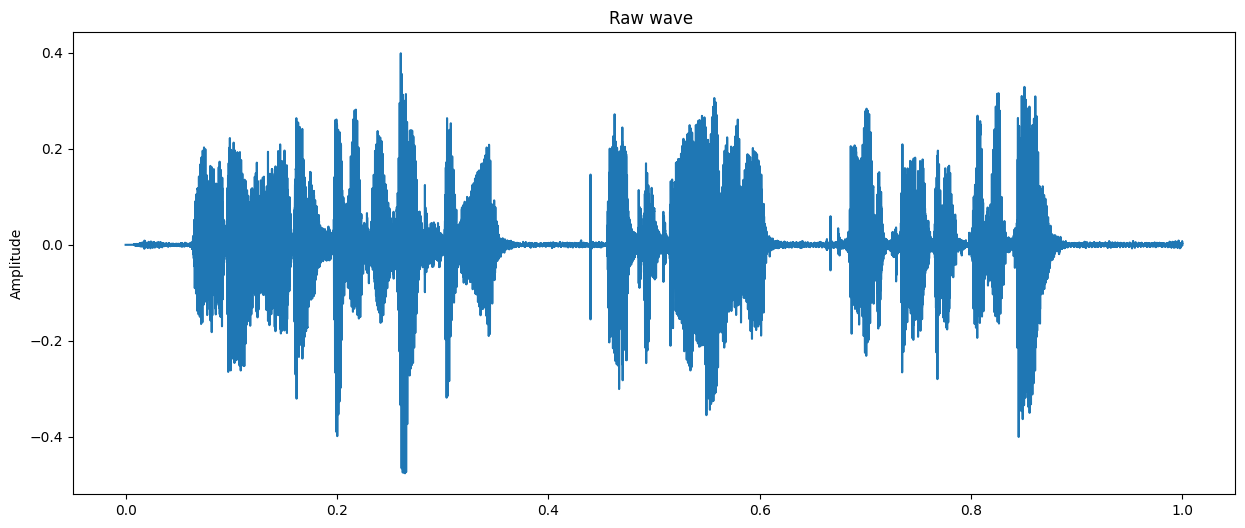

In [82]:
wass = load_audio_file('Audio_data/our_audios/wass_calme_1.wav')
plot_time_series(wass)

In [ ]:
emotions2 = []
for item in neutral:
    emotions.append("neutral")
for item in angry:
    emotions.append("angry")
labels = pd.DataFrame(emotions, columns=[-1])
llist = neutral + angry

df = pd.DataFrame(columns=['feature'])
i2=0
for index,y in enumerate(llist):

    #result=np.array([])
    if index<288:
        x, sample_rate = librosa.load(path+"neutral/"+y)
        mfccs=np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
    else:
        x, sample_rate = librosa.load(path+"angry/"+y)
        mfccs=np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)

    feature = mfccs
    df.loc[i] = [feature]

    i2=i2+1

train2 = pd.concat([df2[:432],df2[480:653]])
test2 = pd.concat([df2[432:480], df2[653:672]])
print("Training sample length: ",len(train))
print("Testing sample length: ",len(test))

# 480 / 192
# 48  / 19
# 432 / 173